In [1]:
import pandas as pd
import numpy as np

In [2]:
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('test_label/y_test.csv')

In [3]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

In [4]:
x_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0
...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0


In [5]:
y_train

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198


In [6]:
def get_mapping(col):
    mapping = {}
    for idx, data in enumerate(col.unique()):
        mapping[data] = idx
    return mapping

In [7]:
def process_data(data):
    brand_mapping = get_mapping(data['brand'])
    model_mapping = get_mapping(data['model'])
    dummy_cols = ['transmission', 'fuelType']
    temp = data.replace(brand_mapping)
    temp = temp.replace(model_mapping)
    temp = pd.get_dummies(temp, columns=dummy_cols)
    return temp

In [8]:
x_data = process_data(x_train)
x_data

,carID,brand,model,year,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,13207,0,0,2019,4223,145.0,39.8,2.2,0,0,0,1,1,0,0,0,0
1,17314,1,1,2015,47870,125.0,60.1,2.0,0,1,0,0,1,0,0,0,0
2,12342,2,2,2019,5151,145.0,29.1,2.9,1,0,0,0,0,0,0,0,1
3,13426,3,3,2016,20423,30.0,57.6,2.0,1,0,0,0,1,0,0,0,0
4,16004,4,4,2020,3569,145.0,47.1,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,5,18,2015,24314,125.0,56.6,2.1,1,0,0,0,1,0,0,0,0
4956,14416,7,17,2017,18000,145.0,51.4,3.0,1,0,0,0,1,0,0,0,0
4957,15453,3,44,2015,84932,30.0,60.1,2.0,0,1,0,0,1,0,0,0,0
4958,14666,2,57,2017,30150,145.0,62.8,3.0,0,0,0,1,1,0,0,0,0


In [9]:
from sklearn.decomposition import PCA

In [44]:
p_data = PCA(2).fit_transform(x_data)

In [45]:
p_data.shape

(4960, 2)

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(x_data)
labels = kmeans.fit_predict(p_data)

In [48]:
labels

array([ 8, 10,  8, ...,  7,  2, 11], dtype=int32)

In [49]:
import matplotlib.pyplot as plt

In [50]:
u_labels = np.unique(labels)
u_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

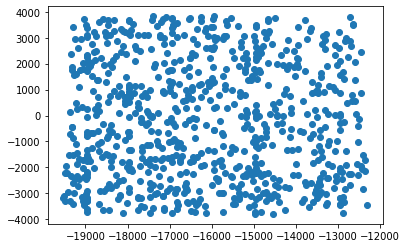

In [51]:
f_label0 = p_data[labels==0]
plt.scatter(f_label0[:,0], f_label0[:,1])
plt.show()

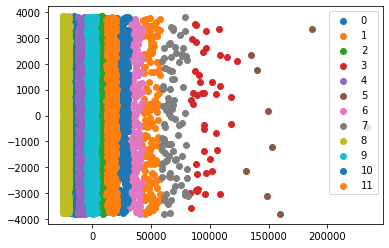

In [52]:
for i in u_labels:
    f_label = p_data[labels==i]
    plt.scatter(p_data[labels == i, 0], p_data[labels == i, 1], label = i)
plt.legend()
plt.show()